#**Network Slicing using Semisupervised Classification which is a Semi Supervised Learning Technique using Self-Training Method.**

In [52]:
# Random Seed for Under-sampling, Data-split and Modeling
import random
#Under-sampling
# a = random.randint(10, 99)
a = 42

# Data-split labelled and unlabelled
# b1 = random.randint(10, 99)
b1 = 42

#Data-split train and test
b2 = 42

#Data Modeling
# c = 42

#Data-split labelled and unlabelled
Z = 0.1

top_features_count = 50
selected_features_count = 10

In [53]:
a

42

In [54]:
b1

42

# **Data Pre-processing**

### **Import Libraries**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [57]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
# data = pd.read_csv('/content/drive/MyDrive/Dataset/deepslice_data.csv.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')
data

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,531568.0000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,360399.0000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,30702.0000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,312747.0000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


In [58]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,531568.0000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,360399.0000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,30702.0000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,312747.0000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


In [59]:
data.columns.tolist()

['X',
 'Seq',
 'Dur',
 'RunTime',
 'Mean',
 'Sum',
 'Min',
 'Max',
 'Proto',
 'sTos',
 'dTos',
 'sDSb',
 'dDSb',
 'sTtl',
 'dTtl',
 'sHops',
 'dHops',
 'Cause',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'DstLoss',
 'pLoss',
 'SrcGap',
 'DstGap',
 'Rate',
 'SrcRate',
 'DstRate',
 'State',
 'SrcWin',
 'DstWin',
 'SrcTCPBase',
 'DstTCPBase',
 'TcpRtt',
 'SynAck',
 'AckDat',
 'UniqueID',
 'SliceType']

In [60]:
data = data.drop(data.columns[0], axis=1)
data

,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,184.000000,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.257735,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,0.257735,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,0.000000,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,0.257735,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,0.000000,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


### **Class Distribution Analysis**

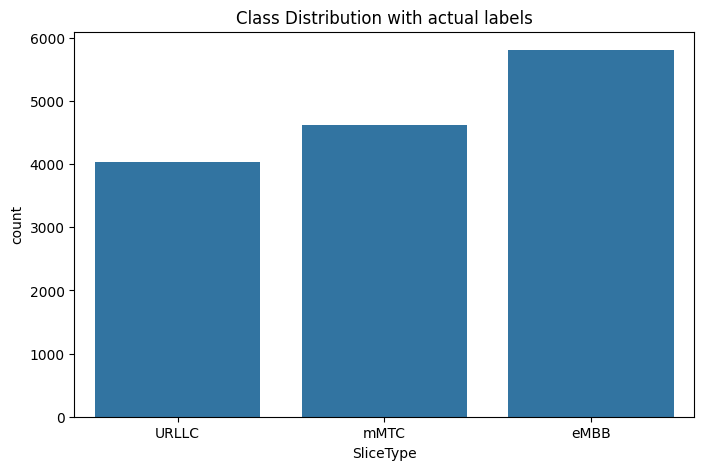

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['SliceType'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

### **Relevant Feature Selection**

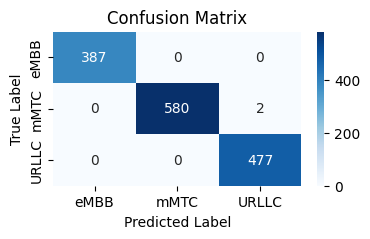

              precision    recall  f1-score   support

       URLLC     1.0000    1.0000    1.0000       387
        eMBB     1.0000    0.9966    0.9983       582
        mMTC     0.9958    1.0000    0.9979       477

    accuracy                         0.9986      1446
   macro avg     0.9986    0.9989    0.9987      1446
weighted avg     0.9986    0.9986    0.9986      1446



In [62]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('SliceType', axis=1)
y = data['SliceType']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
# y_pred

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

In [63]:
top_features = feature_importance['feature'].head(top_features_count).tolist()
# top_features = feature_importance['feature'][start_index:end_index].tolist()
print(top_features)

['Loss', 'Rate', 'pLoss', 'Load', 'DstRate', 'DstLoad', 'SrcRate', 'SrcBytes', 'dMeanPktSz', 'SrcWin', 'DstBytes', 'TotBytes', 'SrcLoad', 'SrcPkts', 'dDSb', 'TotPkts', 'SrcLoss', 'Proto', 'Seq', 'DstWin', 'Min', 'DstLoss', 'Mean', 'Max', 'UniqueID', 'Dur', 'Sum', 'State', 'AckDat', 'RunTime', 'TcpRtt', 'DstPkts', 'SynAck', 'sMeanPktSz', 'dTtl', 'SrcTCPBase', 'dHops', 'sTtl', 'Offset', 'Cause', 'sHops', 'DstTCPBase', 'dTos', 'sDSb', 'sTos', 'DstGap', 'SrcGap']


In [64]:
print("\n Selecting top features")
X = X[top_features]
X.head()


 Selecting top features


,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
0,0.0,3460.207764,0.0,0.000000,0.000000,0.00000,0.000000,64.0,60.000000,64128.000,...,250,163876.0,1,6,3.704605e+09,184.000000,6,224,0,0
1,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,74.0,0.000000,1270506.667,...,249,1714024.0,1,7,2.446250e+09,0.257735,4,0,0,0
2,0.0,0.390587,0.0,131.237137,0.000000,0.00000,0.390587,84.0,0.000000,1270506.667,...,63,26304452.0,2,1,2.446250e+09,0.257735,4,0,0,0
3,0.0,108.662582,0.0,84843.742190,43.465034,23297.25781,43.465034,530.0,66.666664,56960.000,...,64,660484.0,2,0,3.508802e+09,0.000000,4,0,0,0
4,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,42.0,0.000000,1270506.667,...,63,22285688.0,1,1,2.446250e+09,0.257735,4,0,0,0


In [65]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
features = top_features
features

['Loss',
 'Rate',
 'pLoss',
 'Load',
 'DstRate',
 'DstLoad',
 'SrcRate',
 'SrcBytes',
 'dMeanPktSz',
 'SrcWin',
 'DstBytes',
 'TotBytes',
 'SrcLoad',
 'SrcPkts',
 'dDSb',
 'TotPkts',
 'SrcLoss',
 'Proto',
 'Seq',
 'DstWin',
 'Min',
 'DstLoss',
 'Mean',
 'Max',
 'UniqueID',
 'Dur',
 'Sum',
 'State',
 'AckDat',
 'RunTime',
 'TcpRtt',
 'DstPkts',
 'SynAck',
 'sMeanPktSz',
 'dTtl',
 'SrcTCPBase',
 'dHops',
 'sTtl',
 'Offset',
 'Cause',
 'sHops',
 'DstTCPBase',
 'dTos',
 'sDSb',
 'sTos',
 'DstGap',
 'SrcGap']

#### Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all selected features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution) with selected features')
# plt.show()

# **Data Split**

### **Define X and y**

In [66]:
X = data[features]
X

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
0,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,60.000000,64128.000,...,250,1.638760e+05,1,6,3.704605e+09,184.000000,6,224,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,0.000000,1270506.667,...,249,1.714024e+06,1,7,2.446250e+09,0.257735,4,0,0,0
2,0.000000,0.390587,0.000000,131.237137,0.000000,0.000000,0.390587,84.000000,0.000000,1270506.667,...,63,2.630445e+07,2,1,2.446250e+09,0.257735,4,0,0,0
3,0.000000,108.662582,0.000000,84843.742190,43.465034,23297.257810,43.465034,530.000000,66.666664,56960.000,...,64,6.604840e+05,2,0,3.508802e+09,0.000000,4,0,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,1270506.667,...,63,2.228569e+07,1,1,2.446250e+09,0.257735,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2.000000,3.821267,10.105935,2415.138241,1.594339,901.270514,2.019412,895.921888,68.162787,64256.000,...,63,9.837076e+04,1,1,1.485176e+08,0.000000,4,0,0,0
14452,1.257694,3.722216,9.210293,2471.046868,1.400239,763.222253,2.029394,767.564275,67.734197,64256.000,...,63,8.742893e+04,1,1,1.485176e+08,0.000000,4,0,0,0
14453,2.000000,3.840632,10.360201,2283.097961,1.626468,855.459521,2.037339,910.348377,68.009158,64256.000,...,63,9.362468e+04,1,1,1.485176e+08,0.000000,4,0,0,0
14454,1.609694,3.244096,7.659634,2106.446226,1.408035,699.197109,1.797084,839.936962,67.815812,64256.000,...,63,7.425719e+04,1,1,1.485176e+08,0.000000,4,0,0,0


In [67]:
y = data['SliceType']
y

,SliceType
0,URLLC
1,URLLC
2,URLLC
3,URLLC
4,URLLC
...,...
14451,mMTC
14452,mMTC
14453,mMTC
14454,mMTC


### **t-SNE - Dimensionality Reduction**

In [ ]:
X_backup = X
X_backup

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.010000,100,0,1,0,1
1,0.010000,100,0,1,0,1
2,0.010000,100,0,1,0,1
3,0.010000,100,0,1,0,1
4,0.010000,100,0,1,0,1
...,...,...,...,...,...,...
63162,0.000001,10,1,0,0,1
63163,0.000001,10,1,0,0,1
63164,0.000001,10,1,0,0,1
63165,0.000001,10,1,0,0,1


In [ ]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[  13.224804 , -124.9993   ],
       [  13.224804 , -124.9993   ],
       [  13.224804 , -124.9993   ],
       ...,
       [-123.966156 ,   -2.3899918],
       [-123.966156 ,   -2.3899918],
       [-123.966156 ,   -2.3899918]], dtype=float32)

In [ ]:
X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
X

,Feature 1,Feature 2
0,13.224804,-124.999298
1,13.224804,-124.999298
2,13.224804,-124.999298
3,13.224804,-124.999298
4,13.224804,-124.999298
...,...,...
63162,-123.966156,-2.389992
63163,-123.966156,-2.389992
63164,-123.966156,-2.389992
63165,-123.966156,-2.389992


#### Pair Plots

In [ ]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [ ]:
data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
data

,Feature 1,Feature 2,slice Type
0,13.224804,-124.999298,eMBB
1,13.224804,-124.999298,eMBB
2,13.224804,-124.999298,eMBB
3,13.224804,-124.999298,eMBB
4,13.224804,-124.999298,eMBB
...,...,...,...
63162,-123.966156,-2.389992,URLLC
63163,-123.966156,-2.389992,URLLC
63164,-123.966156,-2.389992,URLLC
63165,-123.966156,-2.389992,URLLC


In [ ]:
features = ['Feature 1', 'Feature 2']

### **Define Unlabelled and Labelled Dataset**

In [68]:
print(b1)
print(Z)

42
0.1


In [69]:
# Split the dataset into training and testing sets
# X_labelled = X_train
# X_unlabelled = X_test
# y_labelled = y_train
# y_unlabelled = y_test

X_labelled, X_unlabelled, y_labelled, y_unlabelled = train_test_split(X,y, train_size=Z, random_state=b1)

In [70]:
X_labelled

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
6783,1.041077,37.419465,3.998348,163536.912400,22.485596,119407.390400,18.603307,4851.609087,990.881687,1.800000e+02,...,64,6.162885e+05,1,0,2.646975e+09,0.000000,4,0,0,0
3600,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,63,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0
6490,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,64,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0
8609,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,63,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0
14421,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,63,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,64,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0
13418,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,63,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0
5390,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,63,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0
860,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,63,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0


In [71]:
X_unlabelled

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
3146,0.000000,0.439606,0.000000,1.477076e+02,0.000000,0.000000e+00,0.439606,84.000000,0.000000,1270506.667,...,63,1.166616e+06,1,1,2.446250e+09,0.257735,4,0,0,0
14090,1.000000,3.632123,5.716374,2.263857e+03,1.463701,7.849698e+02,1.928375,900.339579,67.055171,64256.000,...,63,8.434606e+04,1,1,4.150003e+09,0.000000,4,0,0,0
13473,1.000000,3.721983,5.400960,2.541616e+03,1.422970,7.653655e+02,1.994199,925.340938,67.135955,64256.000,...,63,7.207288e+04,1,1,3.128347e+08,0.000000,4,0,0,0
14074,1.000000,3.556572,6.086617,2.171078e+03,1.359428,7.381477e+02,1.739120,807.662359,67.467081,64256.000,...,63,6.890143e+04,1,1,2.059269e+09,0.000000,4,0,0,0
13012,1.000000,4.217047,8.913024,4.715410e+03,2.809133,3.911684e+03,2.193221,328.985211,237.325137,64128.000,...,63,1.024678e+06,2,1,1.770455e+09,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12312,15.797440,12.753148,24.935564,9.824946e+03,4.169645,4.114158e+03,8.276388,3119.813597,122.707550,91648.000,...,64,1.097362e+05,2,0,3.940738e+09,0.000000,4,0,0,0
12951,1.829089,3.426367,7.440641,2.158169e+03,1.477614,6.242238e+02,1.726260,945.656308,69.195689,64256.000,...,63,8.952511e+04,1,1,2.177015e+08,0.000000,4,0,0,0
1205,0.000000,0.350005,0.000000,1.176018e+02,0.000000,0.000000e+00,0.350005,84.000000,0.000000,1270506.667,...,63,1.593848e+07,1,1,2.446250e+09,0.257735,4,0,0,0
4971,1.000000,251.886349,0.245234,1.719570e+06,195.488300,1.556884e+06,96.543884,18227.879540,1374.245846,56448.000,...,64,6.873176e+05,1,0,2.274121e+09,0.000000,4,0,0,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_labelled, y_labelled, test_size=Z, random_state=b1)

In [73]:
X_train

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
7546,1.0,34.731161,4.497347,156940.663700,18.255599,229143.996100,22.480774,1047.502962,1128.517849,56448.000,...,63,9.422410e+06,2,1,4.388114e+08,0.000000,4,0,0,0
3417,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,1270506.667,...,39,3.380800e+04,1,25,2.446250e+09,0.257735,4,0,0,0
7576,1.0,88.038561,5.353721,498131.617200,49.161034,480282.364700,34.610688,497.516408,1217.400024,56704.000,...,63,1.479094e+07,2,1,4.287946e+09,0.000000,4,0,0,0
2681,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000,...,47,1.455600e+05,1,17,2.300072e+09,0.000000,4,0,0,0
3345,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,62592.000,...,63,4.059604e+06,2,1,9.945739e+08,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,0.0,0.359717,0.000000,120.864876,0.000000,0.000000,0.359717,84.000000,0.000000,1270506.667,...,63,1.705980e+07,1,1,2.446250e+09,0.257735,4,0,0,0
2976,0.0,0.387476,0.000000,130.192093,0.000000,0.000000,0.387476,84.000000,0.000000,1270506.667,...,63,6.724552e+06,1,1,2.446250e+09,0.257735,4,0,0,0
14039,1.0,3.339795,8.235328,2217.179940,1.343388,721.125999,1.696877,828.787581,67.170944,64256.000,...,63,8.356151e+04,1,1,6.377462e+08,0.000000,4,0,0,0
1679,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000,1270506.667,...,63,2.364597e+07,2,1,2.446250e+09,0.257735,4,0,0,0


In [74]:
X_test

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
6269,1.000000,56.022241,5.555556,294178.377200,25.119173,296357.504700,21.428263,548.858807,1313.666626,5.696000e+04,...,63,1.014389e+06,2,1,4.232232e+09,0.000000,4,0,0,0
12772,1.606593,5.325830,11.678254,2855.693488,1.645995,830.398034,2.984796,813.873726,68.498992,6.425600e+04,...,63,9.017128e+04,1,1,7.974013e+08,0.000000,4,0,0,0
7022,1.000000,37.889762,4.829461,266767.671400,23.641259,278924.949800,15.017529,4962.867912,1355.906485,5.696000e+04,...,64,1.105003e+06,2,0,3.508802e+09,0.000000,4,0,0,0
13854,1.396459,4.220539,9.805574,2485.096419,1.514048,926.662336,1.987351,806.304010,67.463320,6.425600e+04,...,63,9.706038e+04,1,1,4.277069e+07,0.000000,4,0,0,0
13503,1.324870,5.283541,15.902680,8460.624876,2.344233,5176.925861,2.244016,307.928830,304.555242,6.412800e+04,...,63,1.074994e+06,2,1,3.182780e+09,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11003,1.000000,10.502248,1.948216,29884.345310,5.768168,11678.811190,4.580352,11237.137050,256.529853,4.094000e+03,...,64,2.035540e+05,2,0,3.441197e+09,0.000000,4,0,0,0
4752,1.000000,81.111580,2.494230,426356.909600,60.533269,144341.533800,43.658752,81633.624900,736.572675,5.644800e+04,...,64,5.554612e+05,1,0,1.223059e+09,0.000000,4,0,0,0
13864,2.000000,4.292104,18.181818,5458.831034,2.169938,4484.020712,1.618158,300.000000,258.799988,6.412800e+04,...,63,5.328752e+05,2,1,1.927977e+09,0.000000,4,0,0,0
11911,1.456208,3.995377,47.515362,3376.103531,0.435883,3.628055,3.535524,230.664623,174.040062,1.677696e+07,...,63,6.457656e+06,2,1,2.253651e+09,0.000000,4,0,0,0


# **Data Modelling and Analysis**

## **Base Model Training**

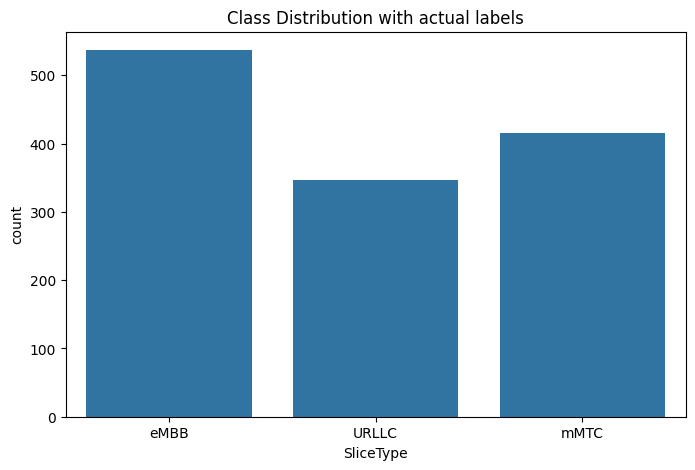

In [75]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title('Class Distribution with actual labels')
plt.show()

### **Under Sampling - Class Imbalance Issue**

In [ ]:
print(a)

67


In [ ]:
# Get the column names from the original DataFrame
X_labelled_column_names = X_labelled.columns.tolist()
X_labelled_column_names

['Loss',
 'Rate',
 'pLoss',
 'Load',
 'DstRate',
 'DstLoad',
 'SrcRate',
 'SrcBytes',
 'dMeanPktSz',
 'SrcWin',
 'DstBytes',
 'TotBytes',
 'SrcLoad',
 'SrcPkts',
 'dDSb',
 'TotPkts',
 'SrcLoss',
 'Proto',
 'Seq',
 'DstWin',
 'Min',
 'DstLoss',
 'Mean',
 'Max',
 'UniqueID',
 'Dur',
 'Sum',
 'State',
 'AckDat',
 'RunTime',
 'TcpRtt',
 'DstPkts',
 'SynAck',
 'sMeanPktSz',
 'dTtl',
 'SrcTCPBase',
 'dHops',
 'sTtl',
 'Offset',
 'Cause',
 'sHops',
 'DstTCPBase',
 'dTos',
 'sDSb',
 'sTos',
 'DstGap',
 'SrcGap']

In [ ]:
# Convert X_unlabelled to a pandas DataFrame
X_labelled_df = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
X_labelled_with_labels = X_labelled_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_labelled_with_labels.reset_index(drop=True, inplace=True)
y_labelled.reset_index(drop=True, inplace=True)
y_labelled = pd.Series(y_labelled, name='SliceType')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_labelled_with_labels['SliceType'] = y_labelled

X_labelled_with_labels

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
0,1.041077,37.419465,3.998348,163536.912400,22.485596,119407.390400,18.603307,4851.609087,990.881687,1.800000e+02,...,6.162885e+05,1,0,2.646975e+09,0.000000,4,0,0,0,eMBB
1,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC
2,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0,eMBB
3,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0,eMBB
4,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0,eMBB
1441,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0,mMTC
1442,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0,eMBB
1443,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC


In [ ]:
# Identify the majority class
majority_class = X_labelled_with_labels['SliceType'].value_counts().idxmax()
print("Majority Class: ", majority_class)

# Count the number of data points in the majority class
majority_count = X_labelled_with_labels['SliceType'].value_counts()[majority_class]
print("Majority Class Count: ", majority_count)

# Count the number of data points in the other two classes
minority_count = X_labelled_with_labels['SliceType'].value_counts().min()
print("Minority Class Count: ", minority_count)

# Calculate the number of data points to remove from the majority class
num_to_remove = majority_count - minority_count
print("Amount of Data to be removed: ", num_to_remove)

# Randomly select data points from the majority class to remove
majority_indices = X_labelled_with_labels[X_labelled_with_labels['SliceType'] == majority_class].index
np.random.seed(a)
remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
print("Indices to be removed: \n", remove_indices[:100])

# Remove the selected data points from the DataFrame
balanced_data = X_labelled_with_labels.drop(remove_indices)

Majority Class:  eMBB
Majority Class Count:  595
Minority Class Count:  383
Amount of Data to be removed:  212
Indices to be removed: 
 [ 115  630 1265   98  828  349  444 1416  832  416  374  433 1339  725
  798  827   18  838  447  289  663 1345  684  852  448 1035  166 1308
  908  661 1052  499  206  174 1433 1432  494 1397 1124 1419  340 1040
  297  995  925  757  395 1403  813  669  169  449 1216 1427   63  647
  764  834  699  141  301  878  805   46  106   19   50 1004  712  446
  251  380  183  193  770  873  368  503 1223  489  918  472  671  677
  521  955  425  991 1034  496  576  303  153 1144  626 1169  567  572
  259  939]


In [ ]:
balanced_data

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
1,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC
2,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0,eMBB
3,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0,eMBB
4,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0,mMTC
5,1.000000,3.292930,8.229258,3393.204984,1.656245,2827.995069,1.486189,339.675454,248.312057,6.412800e+04,...,6.456203e+06,2,1,2.619246e+09,0.000000,4,0,0,0,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0,eMBB
1441,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0,mMTC
1442,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0,eMBB
1443,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC


In [ ]:
balanced_data = balanced_data.reset_index(drop=True)
balanced_data

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
0,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC
1,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0,eMBB
2,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0,eMBB
3,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0,mMTC
4,1.000000,3.292930,8.229258,3393.204984,1.656245,2827.995069,1.486189,339.675454,248.312057,6.412800e+04,...,6.456203e+06,2,1,2.619246e+09,0.000000,4,0,0,0,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0,eMBB
1229,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0,mMTC
1230,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0,eMBB
1231,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0,URLLC


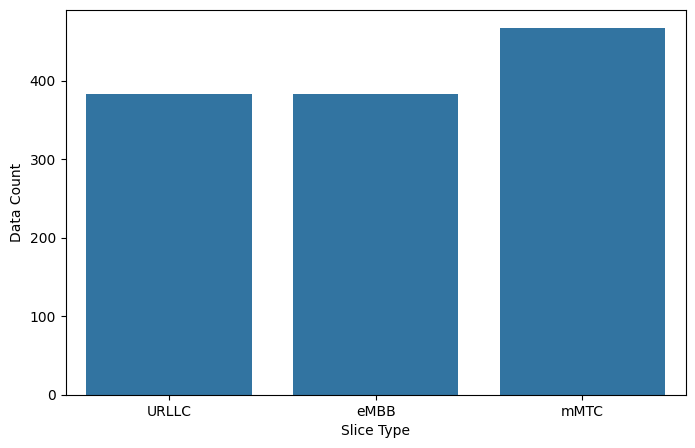

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=balanced_data['SliceType'])
# plt.title('Balanced Class Distribution with actual labels')
plt.xlabel('Slice Type')
plt.ylabel('Data Count')
plt.show()

In [ ]:
X_labelled = balanced_data[features]
X_labelled

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,sTtl,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap
0,0.000000,0.387769,0.000000,130.290329,0.000000,0.000000,0.387769,84.000000,0.000000,1.270507e+06,...,63,8.913244e+06,2,1,2.446250e+09,0.257735,4,0,0,0
1,2.000000,60.754183,3.700181,454038.502500,36.262113,393018.687900,31.574105,10409.426080,1360.604204,5.632000e+04,...,64,6.048447e+05,1,0,3.278420e+08,0.000000,4,0,0,0
2,1.000000,50.540660,4.308849,286984.594600,28.780224,289348.840900,15.699722,1169.597795,1292.695075,5.619200e+04,...,63,1.047852e+07,2,1,2.938787e+09,0.000000,4,0,0,0
3,1.000000,4.180601,10.000000,5300.489817,2.091926,4330.314278,1.568322,308.000000,258.799988,6.412800e+04,...,63,1.160108e+06,2,1,1.511629e+09,0.000000,4,0,0,0
4,1.000000,3.292930,8.229258,3393.204984,1.656245,2827.995069,1.486189,339.675454,248.312057,6.412800e+04,...,63,6.456203e+06,2,1,2.619246e+09,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1.000000,44.364562,0.556081,342301.958500,29.836329,326201.503400,5.482154,4671.828855,1356.633172,5.696000e+04,...,64,2.773116e+06,1,0,5.466176e+08,0.000000,4,0,0,0
1229,1.000000,4.223407,9.310396,4342.127966,2.151351,3252.759624,1.455812,329.918593,242.991987,1.677696e+07,...,63,3.847394e+06,2,1,3.086442e+09,0.000000,4,0,0,0
1230,1.000000,76.774407,5.443820,376826.536600,53.991845,446399.017900,27.727192,590.362162,1065.783469,5.696000e+04,...,63,1.044659e+06,1,1,4.232232e+09,0.000000,4,0,0,0
1231,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,0.388583,84.000000,0.000000,1.270507e+06,...,63,2.708392e+07,2,1,2.446250e+09,0.257735,4,0,0,0


In [ ]:
y_labelled = balanced_data['SliceType']
y_labelled

,SliceType
0,URLLC
1,eMBB
2,eMBB
3,mMTC
4,mMTC
...,...
1228,eMBB
1229,mMTC
1230,eMBB
1231,URLLC


### **Training**

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
model_RFC_base = RandomForestClassifier()
model_RFC_base.fit(X_train, y_train)

RandomForestClassifier()

## **Pseudo Label Creation**

In [78]:
y_pred_temp = model_RFC_base.predict(X_test)

In [79]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your target variable
label_encoder.fit(y)  # Fit on the original 'y' to get all labels

# Transform predictions to string labels
# y_pred = label_encoder.inverse_transform(y_pred_temp.astype(int))

# Transform predictions to numerical representations first
y_pred_numeric = label_encoder.transform(y_pred_temp)

# Then, transform the numerical representations back to string labels
y_pred = label_encoder.inverse_transform(y_pred_numeric)

In [80]:
accuracy_RFC = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy_RFC:.4f}")

precision_RFC = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision_RFC:.4f}")

recall_RFC = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall_RFC:.4f}")

f1score_RFC = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1score_RFC:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Parameters
confidence_threshold = 0.5  # Confidence threshold for pseudo-label selection
accuracies = []  # To store validation accuracies for plotting
iterations = []  # To track iteration numbers

# Initialize an empty list to store all pseudo-labels
all_pseudo_labels = []
all_confident_indices = []  # To store indices of confidently predicted samples


# Iterative self-training process
iteration = 0
while not X_unlabelled.empty:
    iteration += 1

    # Generate pseudo-labels with probabilities
    prob_predictions = model_RFC_base.predict_proba(X_unlabelled)

    # Print the probabilities for the first 5 samples (for debugging purposes)
    print(f"Iteration {iteration} - Predicted Probabilities (first 5 samples):")
    print(prob_predictions[:5])  # Show the probabilities for the first 5 samples
    print()

    # Identify the most confident predictions
    max_probs = np.max(prob_predictions, axis=1)
    confident_indices = np.where(max_probs >= confidence_threshold)[0]

    # If no confident predictions, stop the process
    if len(confident_indices) == 0:
        print(f"Stopping early at iteration {iteration}: No confident pseudo-labels.")
        break

    # Extract confident samples
    pseudo_labels = np.argmax(prob_predictions[confident_indices], axis=1)
    X_confident = X_unlabelled.iloc[confident_indices]

    # Ensure compatibility of pseudo-labels with y_labelled
    if y_labelled.dtype == 'object':
        y_labelled = pd.factorize(y_labelled)[0]
    pseudo_labels = pseudo_labels.astype(y_labelled.dtype)

    # Augment labelled dataset
    X_labelled = np.vstack((X_labelled, X_confident))
    y_labelled = np.hstack((y_labelled, pseudo_labels))

    # Remove newly labelled data from unlabelled set
    X_unlabelled = X_unlabelled.drop(X_unlabelled.index[confident_indices]).reset_index(drop=True)

    # Train a new classifier
    model_RFC_base = RandomForestClassifier(random_state=42)
    model_RFC_base.fit(X_labelled, y_labelled)

    # Evaluate the new classifier on the validation set (X_val, y_val)
    y_test_pred = model_RFC_base.predict(X_test)

    # Transform y_test_pred to string labels before calculating accuracy
    y_test_pred_str = label_encoder.inverse_transform(y_test_pred.astype(int))

    accuracy = accuracy_score(y_test, y_test_pred_str)

    # Store iteration and accuracy
    accuracies.append(accuracy)
    iterations.append(iteration)

    # Store pseudo-labels and confident indices
    all_pseudo_labels.extend(pseudo_labels)  # Extend the list with new pseudo-labels
    all_confident_indices.extend(confident_indices)  # Extend with indices

    print(f"Iteration {iteration}: Validation Accuracy = {accuracy:.4f}, Remaining unlabeled samples: {X_unlabelled.shape[0]}, Confident samples = {len(confident_indices)}")

print("Self-training complete.")

# # Plot the accuracy curve
# plt.figure(figsize=(10, 6))
# plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
# plt.xlabel("Iteration")
# plt.ylabel("Validation Accuracy")
# plt.title("Validation Accuracy Over Iterations")
# plt.grid()
# plt.show()

Iteration 1 - Predicted Probabilities (first 5 samples):
[[1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.01 0.   0.99]
 [0.   0.   1.  ]
 [0.   0.   1.  ]]



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Iteration 1: Validation Accuracy = 0.3517, Remaining unlabeled samples: 9, Confident samples = 13002
Iteration 2 - Predicted Probabilities (first 5 samples):
[[0.16 0.16 0.68]
 [0.55 0.29 0.16]
 [0.58 0.15 0.27]
 [0.14 0.15 0.71]
 [0.11 0.08 0.81]]

Iteration 2: Validation Accuracy = 0.3517, Remaining unlabeled samples: 1, Confident samples = 8
Iteration 3 - Predicted Probabilities (first 5 samples):
[[0.27 0.3  0.43]]

Stopping early at iteration 3: No confident pseudo-labels.
Self-training complete.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [82]:
y_test_pred

array([0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2,
       0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0,
       2, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1,
       1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 1,
       0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1])

In [83]:
y_test_pred_str

array(['URLLC', 'mMTC', 'URLLC', 'mMTC', 'mMTC', 'URLLC', 'mMTC', 'URLLC',
       'URLLC', 'mMTC', 'eMBB', 'mMTC', 'eMBB', 'eMBB', 'mMTC', 'mMTC',
       'URLLC', 'mMTC', 'mMTC', 'URLLC', 'eMBB', 'mMTC', 'URLLC', 'eMBB',
       'eMBB', 'mMTC', 'mMTC', 'URLLC', 'eMBB', 'mMTC', 'URLLC', 'URLLC',
       'mMTC', 'mMTC', 'URLLC', 'URLLC', 'eMBB', 'eMBB', 'mMTC', 'eMBB',
       'URLLC', 'mMTC', 'eMBB', 'eMBB', 'mMTC', 'URLLC', 'URLLC', 'URLLC',
       'URLLC', 'mMTC', 'mMTC', 'eMBB', 'URLLC', 'URLLC', 'URLLC',
       'URLLC', 'mMTC', 'mMTC', 'mMTC', 'mMTC', 'eMBB', 'mMTC', 'eMBB',
       'URLLC', 'eMBB', 'URLLC', 'mMTC', 'URLLC', 'URLLC', 'eMBB',
       'URLLC', 'eMBB', 'mMTC', 'mMTC', 'mMTC', 'URLLC', 'URLLC', 'eMBB',
       'mMTC', 'eMBB', 'mMTC', 'URLLC', 'URLLC', 'eMBB', 'eMBB', 'URLLC',
       'mMTC', 'eMBB', 'eMBB', 'URLLC', 'mMTC', 'mMTC', 'URLLC', 'URLLC',
       'eMBB', 'mMTC', 'eMBB', 'mMTC', 'eMBB', 'URLLC', 'URLLC', 'URLLC',
       'URLLC', 'URLLC', 'eMBB', 'mMTC', 'mMTC', 'eMBB'

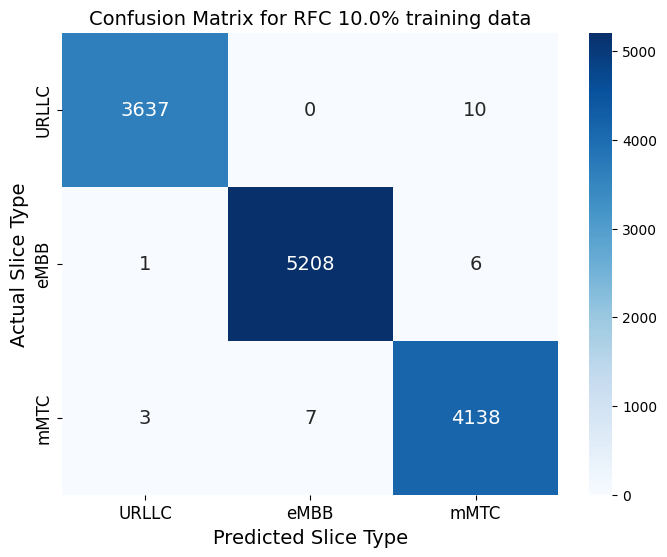

In [84]:
# Confusion Matrix
# Convert all accumulated pseudo-labels to string labels
all_pseudo_labels_str = label_encoder.inverse_transform(np.array(all_pseudo_labels).astype(int))

# Select the corresponding true labels from the original y_unlabelled
y_unlabelled_confident = y_unlabelled.iloc[all_confident_indices]

cm_RFC = confusion_matrix(y_unlabelled_confident, all_pseudo_labels_str)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y), annot_kws={"size": 14})
plt.title(f'Confusion Matrix for RFC {Z*100}% training data', fontsize=14)
plt.xlabel('Predicted Slice Type', fontsize=14)
plt.ylabel('Actual Slice Type', fontsize=14)

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [85]:
# Print classification report
print(classification_report(y_unlabelled_confident, all_pseudo_labels_str, digits=4))

              precision    recall  f1-score   support

       URLLC     0.9989    0.9973    0.9981      3647
        eMBB     0.9987    0.9987    0.9987      5215
        mMTC     0.9961    0.9976    0.9969      4148

    accuracy                         0.9979     13010
   macro avg     0.9979    0.9978    0.9979     13010
weighted avg     0.9979    0.9979    0.9979     13010



In [86]:
accuracy_RFC = accuracy_score(y_unlabelled_confident, all_pseudo_labels_str)
print(f"Accuracy: {accuracy_RFC:.4f}")

precision_RFC = precision_score(y_unlabelled_confident, all_pseudo_labels_str, average='weighted')
print(f"Precision: {precision_RFC:.4f}")

recall_RFC = recall_score(y_unlabelled_confident, all_pseudo_labels_str, average='weighted')
print(f"Recall: {recall_RFC:.4f}")

f1score_RFC = f1_score(y_unlabelled_confident, all_pseudo_labels_str, average='weighted')
print(f"F1-score: {f1score_RFC:.4f}")

Accuracy: 0.9979
Precision: 0.9979
Recall: 0.9979
F1-score: 0.9979


## **New Dataset Creation**

In [55]:
# # Get the column names from the original DataFrame
# X_unlabelled_column_names = X_unlabelled.columns.tolist()
# X_unlabelled_column_names

In [56]:
# # Convert X_unlabelled to a pandas DataFrame
# X_unlabelled_df_RFC = pd.DataFrame(X_unlabelled, columns=X_unlabelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
# X_unlabelled_with_pseudo_labels_RFC = X_unlabelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_unlabelled_with_pseudo_labels_RFC.reset_index(drop=True, inplace=True)
# # pseudo_labels.reset_index(drop=True, inplace=True)
# pseudo_labels = pd.Series(pseudo_labels, name='slice Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_unlabelled_with_pseudo_labels_RFC['slice Type'] = pseudo_labels

# X_unlabelled_with_pseudo_labels_RFC

In [57]:
# # Get the column names from the original DataFrame
# X_labelled_column_names = X_labelled.columns.tolist()
# X_labelled_column_names

In [49]:
# # Convert X_unlabelled to a pandas DataFrame
# X_labelled_df_RFC = pd.DataFrame(X_labelled, columns=X_labelled_column_names)  # Replace X_unlabelled_column_names with your actual column names
# X_labelled_with_labels_RFC = X_labelled_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# # Resetting indices to avoid alignment issues
# X_labelled_with_labels_RFC.reset_index(drop=True, inplace=True)
# y_labelled.reset_index(drop=True, inplace=True)
# y_labelled = pd.Series(y_labelled, name='slice Type')  # Convert y_pred to a pandas Series

# # Add y_test and y_pred columns to the DataFrame
# X_labelled_with_labels_RFC['slice Type'] = y_labelled

# X_labelled_with_labels_RFC

In [50]:
# data_new = pd.concat([X_labelled_with_labels_RFC, X_unlabelled_with_pseudo_labels_RFC], ignore_index=True)
# # data_new = data_new.dropna()
# data_new

### **New Classifier Model Training**

In [58]:
# print(b2)

In [60]:
# X = data_new[features]
# X

In [61]:
# y = data_new['slice Type']
# y

In [62]:
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=b2)
# X_train

In [63]:
# X_test

In [64]:
# model_RFC_new = RandomForestClassifier()
# model_RFC_new.fit(X_train, y_train)

# **Model Testing**

In [66]:
# # Predict the labels for the test data
# y_pred = model_RFC_new.predict(X_test)
# y_pred

## **Update testing dataset with labels**

In [ ]:
# # Get the column names from the original DataFrame
# X_test_column_names = X_test.columns.tolist()

# # Convert X_test to a pandas DataFrame
# # X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# # Create a copy to avoid modifying the original DataFrame
# X_test_with_labels = X_test.copy()

# # Resetting indices to avoid alignment issues
# X_test_with_labels.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# # y_pred.reset_index(drop=True, inplace=True)

# actual_label = pd.Series(y_test, name='actual_label')
# predicted_label = pd.Series(y_pred, name='predicted_label')

# # Include the 'predicted labels' as a new column in the DataFrame
# X_test_with_labels['actual_label'] = actual_label

# # Include the 'predicted labels' as a new column in the DataFrame
# X_test_with_labels['predicted_label'] = predicted_label

In [65]:
# Display the Updated Table
# X_test_with_labels[:20]

## **Predicted Label Analysis**

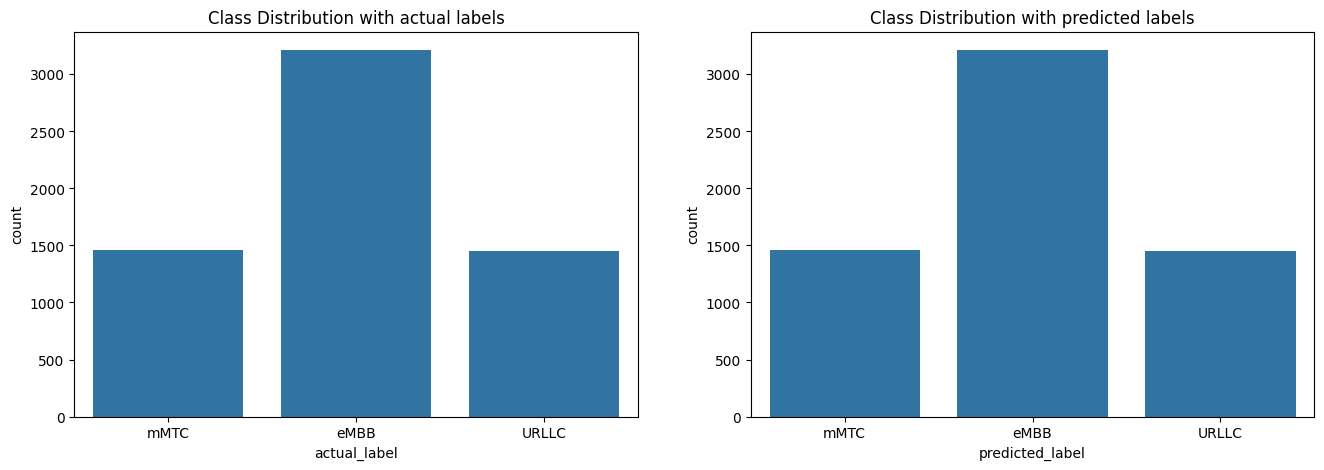

In [ ]:
# # Class Distribution

# fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# sns.countplot(x=actual_label, ax=axs[0])
# axs[0].set_title('Class Distribution with actual labels')

# sns.countplot(x=predicted_label, ax=axs[1])
# axs[1].set_title('Class Distribution with predicted labels')

# plt.show()

### **Confusion Matrix**

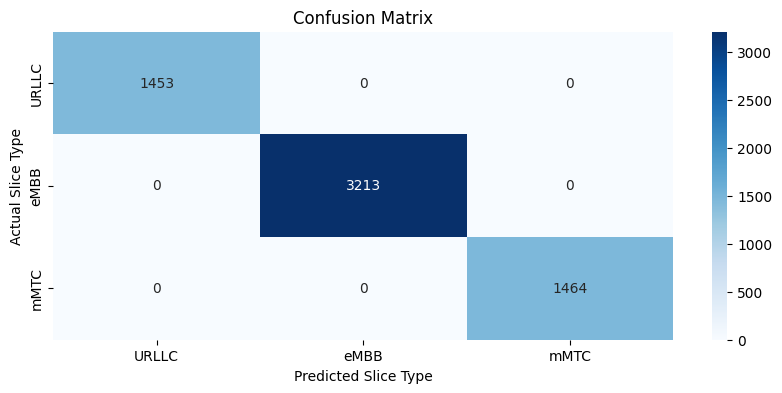

In [ ]:
# # Confusion Matrix
# plt.figure(figsize=(10, 4))
# cm = confusion_matrix(actual_label, predicted_label)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Slice Type')
# plt.ylabel('Actual Slice Type')
# plt.show()
# # print("\n", a, b, c)

In [ ]:
# # Calculate accuracy
# print("Accuracy", accuracy_score(actual_label, predicted_label))

# # Calculate precision
# print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# # Calculate recall
# print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# # Calculate F1-score
# print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 1.0
Precision 1.0
Recall 1.0
F1-score 1.0


In [ ]:
# # Calculate the Silhouette Score
# silhouette_score_test = silhouette_score(X_test, predicted_label)

# # Print or use the Silhouette Score for evaluation
# print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.38129216


In [ ]:
# # Calculate Davies-Bouldin Index
# db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# # Print or use the DBI for evaluation
# print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 0.9552817410977821


In [ ]:
# # Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
# ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# # Print or use the ARI for evaluation
# print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 1.0


# **Data Perturbation**

In [87]:
# Create a copy to avoid modifying the original DataFrame
test_data_perturbed = X_test.copy()

# Resetting indices to avoid alignment issues
test_data_perturbed.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')

# Include the 'predicted labels' as a new column in the DataFrame
test_data_perturbed['actual_label'] = actual_label
test_data_perturbed

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap,actual_label
0,1.000000,56.022241,5.555556,294178.377200,25.119173,296357.504700,21.428263,548.858807,1313.666626,5.696000e+04,...,1.014389e+06,2,1,4.232232e+09,0.000000,4,0,0,0,eMBB
1,1.606593,5.325830,11.678254,2855.693488,1.645995,830.398034,2.984796,813.873726,68.498992,6.425600e+04,...,9.017128e+04,1,1,7.974013e+08,0.000000,4,0,0,0,mMTC
2,1.000000,37.889762,4.829461,266767.671400,23.641259,278924.949800,15.017529,4962.867912,1355.906485,5.696000e+04,...,1.105003e+06,2,0,3.508802e+09,0.000000,4,0,0,0,eMBB
3,1.396459,4.220539,9.805574,2485.096419,1.514048,926.662336,1.987351,806.304010,67.463320,6.425600e+04,...,9.706038e+04,1,1,4.277069e+07,0.000000,4,0,0,0,mMTC
4,1.324870,5.283541,15.902680,8460.624876,2.344233,5176.925861,2.244016,307.928830,304.555242,6.412800e+04,...,1.074994e+06,2,1,3.182780e+09,0.000000,4,0,0,0,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1.000000,10.502248,1.948216,29884.345310,5.768168,11678.811190,4.580352,11237.137050,256.529853,4.094000e+03,...,2.035540e+05,2,0,3.441197e+09,0.000000,4,0,0,0,mMTC
141,1.000000,81.111580,2.494230,426356.909600,60.533269,144341.533800,43.658752,81633.624900,736.572675,5.644800e+04,...,5.554612e+05,1,0,1.223059e+09,0.000000,4,0,0,0,eMBB
142,2.000000,4.292104,18.181818,5458.831034,2.169938,4484.020712,1.618158,300.000000,258.799988,6.412800e+04,...,5.328752e+05,2,1,1.927977e+09,0.000000,4,0,0,0,mMTC
143,1.456208,3.995377,47.515362,3376.103531,0.435883,3.628055,3.535524,230.664623,174.040062,1.677696e+07,...,6.457656e+06,2,1,2.253651e+09,0.000000,4,0,0,0,mMTC


In [88]:
# features= ['Load', 'Rate', 'DstLoad', 'DstRate', 'Loss', 'SrcRate', 'dMeanPktSz', 'SrcLoad', 'pLoss', 'DstBytes']
features= test_data_perturbed.select_dtypes(include=[np.number]).columns
selected_features = features[:selected_features_count]

test_data_perturbed[selected_features]
print("Selected Features:", selected_features.values, "\n")

Selected Features: ['Loss' 'Rate' 'pLoss' 'Load' 'DstRate' 'DstLoad' 'SrcRate' 'SrcBytes'
 'dMeanPktSz' 'SrcWin'] 



In [89]:
# Calculate the standard deviation for each numeric column
std_devs = test_data_perturbed[selected_features].std()

# Suggested noise scale as 10% of the standard deviation (you can adjust this factor)
noise_scale = std_devs * 0.1

# print(noise_scale)

# Add Gaussian noise to specific columns
for column in test_data_perturbed[selected_features].columns:
  noise = np.random.normal(0, noise_scale[column], test_data_perturbed[column].shape)
  test_data_perturbed[column] += noise

test_data_perturbed

,Loss,Rate,pLoss,Load,DstRate,DstLoad,SrcRate,SrcBytes,dMeanPktSz,SrcWin,...,Offset,Cause,sHops,DstTCPBase,dTos,sDSb,sTos,DstGap,SrcGap,actual_label
0,1.061828,55.593244,5.312350,220140.810599,14.160880,248414.638447,19.748783,1072.537085,1287.648038,-1.348456e+05,...,1.014389e+06,2,1,4.232232e+09,0.000000,4,0,0,0,eMBB
1,1.474074,-10.579550,10.734258,84471.466640,1.133196,-716.863565,0.250140,1924.915470,-24.113759,1.979797e+05,...,9.017128e+04,1,1,7.974013e+08,0.000000,4,0,0,0,mMTC
2,0.855917,38.258601,5.002723,316547.129920,25.493501,195400.552975,21.673309,5896.046397,1265.641965,-6.166295e+05,...,1.105003e+06,2,0,3.508802e+09,0.000000,4,0,0,0,eMBB
3,1.521639,-14.369315,10.013197,7015.928957,7.554085,53527.516131,5.903125,1137.717081,24.482587,2.080748e+05,...,9.706038e+04,1,1,4.277069e+07,0.000000,4,0,0,0,mMTC
4,1.511398,2.840598,14.034814,93465.991718,3.078353,39690.593206,9.804122,596.463865,360.457465,4.942127e+05,...,1.074994e+06,2,1,3.182780e+09,0.000000,4,0,0,0,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.551546,14.364404,2.468400,135948.303518,8.615148,9911.257168,2.644745,11107.117290,319.798684,-2.270726e+04,...,2.035540e+05,2,0,3.441197e+09,0.000000,4,0,0,0,mMTC
141,1.193148,81.009987,3.194073,422730.046756,53.284668,132281.862837,40.814596,82444.651026,772.744345,5.965457e+05,...,5.554612e+05,1,0,1.223059e+09,0.000000,4,0,0,0,eMBB
142,2.513635,0.680689,19.003668,33209.588680,1.498953,85095.647767,-1.664894,2302.925951,270.159955,-4.811097e+05,...,5.328752e+05,2,1,1.927977e+09,0.000000,4,0,0,0,mMTC
143,1.988072,2.151991,47.925438,-22743.830647,-0.985977,108296.385415,2.867440,-10.624380,231.671501,1.662540e+07,...,6.457656e+06,2,1,2.253651e+09,0.000000,4,0,0,0,mMTC


In [90]:
# Verification of Unaffected Columns - must return true
unchanged_columns = test_data_perturbed.drop(selected_features, axis=1)
print(unchanged_columns.equals(test_data_perturbed.drop(selected_features, axis=1)))

True


In [91]:
X_test_perturbed = test_data_perturbed.drop('actual_label', axis=1)
y_test_perturbed = test_data_perturbed['actual_label']
y_test_perturbed

,actual_label
0,eMBB
1,mMTC
2,eMBB
3,mMTC
4,mMTC
...,...
140,mMTC
141,eMBB
142,mMTC
143,mMTC


In [92]:
# Make predictions
y_pred_on_perturbed = model_RFC_base.predict(X_test_perturbed)
y_pred_on_perturbed

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1,
       0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0])

In [93]:
# Transform y_test_pred to string labels before calculating accuracy
# y_pred_on_perturbed_str = label_encoder.inverse_transform(y_pred_on_perturbed.astype(int))
y_pred_on_perturbed = pd.Series(y_pred_on_perturbed).replace({0: 'eMBB', 1: 'mMTC', 2: 'URLLC'}).to_numpy()
y_pred_on_perturbed

array(['mMTC', 'URLLC', 'eMBB', 'URLLC', 'URLLC', 'URLLC', 'URLLC',
       'mMTC', 'mMTC', 'eMBB', 'eMBB', 'URLLC', 'eMBB', 'eMBB', 'URLLC',
       'URLLC', 'mMTC', 'URLLC', 'URLLC', 'URLLC', 'eMBB', 'URLLC',
       'URLLC', 'eMBB', 'eMBB', 'URLLC', 'URLLC', 'mMTC', 'eMBB', 'URLLC',
       'mMTC', 'eMBB', 'URLLC', 'URLLC', 'eMBB', 'URLLC', 'mMTC', 'eMBB',
       'URLLC', 'eMBB', 'URLLC', 'URLLC', 'eMBB', 'eMBB', 'URLLC', 'eMBB',
       'mMTC', 'mMTC', 'mMTC', 'URLLC', 'URLLC', 'eMBB', 'mMTC', 'URLLC',
       'eMBB', 'mMTC', 'URLLC', 'URLLC', 'URLLC', 'URLLC', 'eMBB',
       'URLLC', 'eMBB', 'eMBB', 'eMBB', 'eMBB', 'URLLC', 'eMBB', 'URLLC',
       'eMBB', 'URLLC', 'eMBB', 'URLLC', 'URLLC', 'URLLC', 'mMTC', 'mMTC',
       'eMBB', 'URLLC', 'mMTC', 'URLLC', 'mMTC', 'mMTC', 'eMBB', 'eMBB',
       'eMBB', 'URLLC', 'eMBB', 'eMBB', 'mMTC', 'URLLC', 'URLLC', 'URLLC',
       'URLLC', 'eMBB', 'URLLC', 'eMBB', 'URLLC', 'eMBB', 'URLLC', 'mMTC',
       'eMBB', 'mMTC', 'URLLC', 'eMBB', 'URLLC', 'URLL

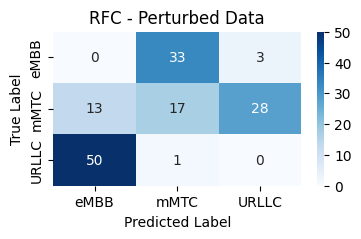

              precision    recall  f1-score   support

       URLLC     0.0000    0.0000    0.0000        36
        eMBB     0.3333    0.2931    0.3119        58
        mMTC     0.0000    0.0000    0.0000        51

    accuracy                         0.1172       145
   macro avg     0.1111    0.0977    0.1040       145
weighted avg     0.1333    0.1172    0.1248       145



In [94]:
# Print confusion matrix
cm = confusion_matrix(y_test_perturbed, y_pred_on_perturbed)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('RFC - Perturbed Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test_perturbed, y_pred_on_perturbed, digits=4))

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp24- NSI_SSL_undersampling_tsne_5GSliceNdd.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'